<a href="https://colab.research.google.com/github/Ankur099IIT/Introduction-to-Tensorflow-for-AI-ML-and-DS_coursera_Ankur-codes/blob/main/ImageDataGenerator_with_a_Validation_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-04-24 01:14:44--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 142.250.152.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   161MB/s    in 0.9s    

2022-04-24 01:14:45 (161 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-04-24 01:15:01--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.114.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.07s   

2022-04-24 01:15:01 (148 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
import zipfile

zip_ref = zipfile.ZipFile('/content/horse-or-human.zip', 'r')
zip_ref.extractall('/content/horse-or-human')

In [6]:
zip_ref = zipfile.ZipFile('/content/validation-horse-or-human.zip', 'r')
zip_ref.extractall('/content/validation-horse-or-human')

In [18]:
import os
train_horse_dir = os.path.join('/content/horse-or-human/horses')
train_human_dir = os.path.join('/content/horse-or-human/humans')
validation_horse_dir = os.path.join('/content/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/content/validation-horse-or-human/humans')

In [19]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

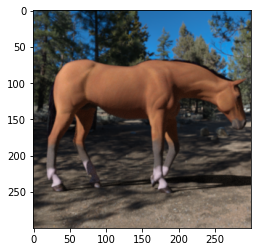

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

file_name = train_horse_names[0]
file_path = os.path.join(train_horse_dir, file_name)
img = mpimg.imread(file_path)
plt.imshow(img)

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    '/content/horse-or-human', 
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
  )


validation_generator = validation_datagen.flow_from_directory(
    '/content/validation-horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [25]:
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300,300,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [28]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [37]:
model.fit(train_generator, 
          steps_per_epoch = 8, 
          validation_data = validation_generator,
          validation_steps = 8,
          epochs = 15,
          verbose = 1)

Epoch 1/15
8/8 [==============================] - 96s 12s/step - loss: 1.7913 - accuracy: 0.4794 - val_loss: 0.6075 - val_accuracy: 0.6016
Epoch 2/15
8/8 [==============================] - 79s 10s/step - loss: 0.4718 - accuracy: 0.7809
Epoch 3/15
8/8 [==============================] - 79s 11s/step - loss: 0.4409 - accuracy: 0.7998
Epoch 4/15
8/8 [==============================] - 78s 10s/step - loss: 0.5449 - accuracy: 0.8265
Epoch 5/15
8/8 [==============================] - 79s 10s/step - loss: 0.1398 - accuracy: 0.9522
Epoch 6/15
8/8 [==============================] - 78s 10s/step - loss: 0.1214 - accuracy: 0.9477
Epoch 7/15
8/8 [==============================] - 79s 10s/step - loss: 0.0406 - accuracy: 0.9878
Epoch 8/15
8/8 [==============================] - 83s 10s/step - loss: 0.0408 - accuracy: 0.9867
Epoch 9/15
8/8 [==============================] - 80s 10s/step - loss: 0.0069 - accuracy: 1.0000
Epoch 10/15
8/8 [==============================] - 79s 10s/step - loss: 0.0060 - accu